# Задание 17

Мы уже работали с файлами в предыдущих заданиях, однако в данном случае необходимо будет "подключить" текстовый файл к программе на python. Для этого откроем файл, сохранив его в переменную:

In [ ]:
f = open('17.txt')

Теперь нашему коду "известен" указанный файл. Для того, чтобы конструкция выше сработала, необходимо, чтобы файл лежал в той же папке, что и код. В противном случае необходимо прописывать полный путь до файла, что крайне неудобно. Позаботьтесь об этом заранее, просто скопировав файл в ту папку, где находится код. 
Далее необходимо прочитать это файл, получив из него массив чисел: 

In [ ]:
x = [] # создаём пустой массив
for line in f: # перебираем строчки в файле
    n = int(line) # делаем строку целым числом
    x += [n] # добавляем строку к массиву

Однако на практике удобнее сразу использовать конструкцию, называемую <b>генератор массивов</b>:

In [ ]:
x = [int(i) for i in f]

<h3>Перебор подряд идущих пар</h3>

Допустим, мы уже считали все числа из файла в массив x. Далее, нам <b>не нужно возвращаться к файлу и переменной f</b>, будем использовать только массив. Перебирать будем не сами числа, а <b>их индексы</b>. Так, в общем случае <i>i-ый</i> элемент массива имеет последующий с индексом <i>i+1</i>.
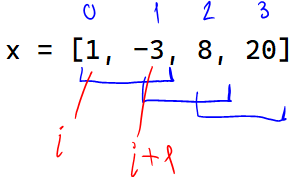

In [5]:
x = [1, -3, 8, 20]
for i in range(len(x) - 1): #перебираем до длины массива минус один, так как самый последний элемент не имеет последующего
    print(x[i], x[i + 1])

1 -3
-3 8
8 20


<h3>Перебор всевозможных пар</h3>

Рассмотрим всё тот же массив x. Элемент x[0] образует пары со всеми последующими элементами: (1, -3), (1, 8), (1, 20). Следующий за ним элемент также образует пары со всеми последующими элементами, при этом с предыдущим элементом пару он уже образовал: (-3, 8), (-3, 20). 
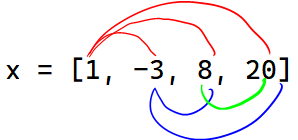

<h6>При переборе всех пар каждый элемент образует пары только с последующими</h6>

Таким образом, нам понадобится два цикла for. Первый будет выбирать элемент, а второй подбирать для него пары, объединяя с последующими. Сам с собой элемент пару образовывать не может!

In [8]:
x = [1, -3, 8, 20]
for i in range(len(x)): # перебираем до длины массива, помним, что последний элемент в цикл for не включается
    for j in range(i + 1, len(x)): # перебираем все последующие за x[i] элементы
        print(x[i], x[j])

1 -3
1 8
1 20
-3 8
-3 20
8 20


In [ ]:
<h3>Проверка условий</h3>

Например, нам необходимо проверить, заканчивается ли число на 7. Для этого возьмём остаток от деления на основание системы счисления, то есть остаток от деления на 10:

In [1]:
a = 107
print(a % 10 == 7)

True


Однако, с отрицательными числами это может не сработать:

In [3]:
a = -107
print(a % 10, a % 10 == 7) # число оканчивается на цифру 7, но эта конструкция не сработает
print(abs(a) % 10, abs(a) % 10 == 7) # а конструкция с модулем сработает

3 False
7 True


В примере выше остаток от отрицательных чисел берётся по математическим правилам. Поэтому без использования модуля остаток от деления -107 на 7 равен 3.

<b>Если для проверки условия необходимо использовать остаток от деления, и в файле есть отрицательные числа, то обязательно берите число по модулю!</b>

<h3>Нахождение минимальной/максимальной пары</h3>

<b>• Переменную для хранения минимума изначально делаем очень большим числом</b>

<b>• Переменную для хранения максимума изначально делаем очень маленьким числом</b>

<h3>Примеры решения</h3>

<i><b>В файле содержится последовательность целых чисел.
Элементы последовательности могут принимать целые значения от 1 до 100 000 включительно.
Определите количество пар последовательности, в которых только одно число трехзначное, и сумма элементов
пары кратна минимальному трехзначному значению последовательности, оканчивающемуся на 5.
В ответе запишите два числа: сначала количество найденных пар, затем минимальную из сумм элементов таких пар.
В данной задаче под парой подразумевается два идущих подряд элемента последовательности.</b></i>

In [ ]:
def t(n): # проверка на трёхзначность для удобства вынесена в функцию
    return (n > 99) and (n < 1000) 

f = open('17_7596.txt')
a = [int(i) for i in f]
x = min([i for i in a if t(i) and i % 10 == 5]) # находим минимальное трёхзначное, оканчивающееся на 5
n = 0 # счётчик пар
mn = 200_000 # переменная для хранения минимальной суммы пары

for i in range(len(a) - 1):
    if ((t(a[i]) and t(a[i+1]) == 0) or (t(a[i + 1]) and t(a[i]) == 0)) and (a[i] + a[i + 1]) % x == 0: # проверка условия
        n += 1 # увеличиваем счётчик
        mn = min(mn, (a[i] + a[i + 1])) # обновляем минимум
print(n, mn)

<i><b>В файле содержится последовательность целых чисел, которые принимают значения от -10000 до 10000 включительно.
Тройка идущих подряд чисел последовательности называется уникальной, если только второе из них является положительным
числом, заканчивающимся на 9. Определите количество уникальных троек чисел,
а затем – максимальную из всех сумм таких троек.</b></i>

In [ ]:
f = open('17_2398.txt')
n = [int(i) for i in f]
ans = 0 # счётчик количества троек
mx = -10000 * 3 # переменная для хранения максимальной суммы троек
for i in range(len(n) - 2):
    if (n[i + 1] > 0 and n[i + 1] % 10 == 9) and not (n[i] > 0 and n[i] % 10 == 9) and not (
            n[i + 2] > 0 and n[i + 2] % 10 == 9): #проверяем, что только второе (i + 1) число подходит под условие
        ans += 1 # увеличиваем счётчик
        mx = max(mx, n[i] + n[i + 1] + n[i + 2]) # обновляем максимум
print(ans, mx)